In [58]:
# tkinter 소개 -> http://pythonstudy.xyz/python/article/120-Tkinter-%EC%86%8C%EA%B0%9C
from tkinter import filedialog # 파일 경로설정 1
from gensim import corpora
from gensim import models
from tqdm import tqdm_notebook

import pandas as pd
import easygui # 파일 경로설정 2

In [59]:
# 파일 경로
# https://stackoverflow.com/questions/9319317/quick-and-easy-file-dialog-in-python

# from tkinter import *
# from tkinter import filedialog

#root = Tk()
#root.withdraw()

# import tkinter as tk일 경우
# root = tk.Tk()

#file_path = filedialog.askopenfilename(initialdir = "E:/[Python]", title = "Select file")
#root.file_path = filedialog.askopenfilename(initialdir = "E:/[Python]", title = "Select file")

path = easygui.fileopenbox()
#E:\\[python]\\[Python]\\data\\wizely.csv

In [60]:
# 1) file_road
df = pd.read_csv(path)
documents = list(df['Contents'])

In [61]:
# 2) 자연어 전처리

# 이모티콘 제거방법
# https://studyprogram.tistory.com/1
import re

def deEmojify1(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

def deEmojify2(text):
    emoji_pattern = re.compile("["
                u"a-zA-Zㄱ-ㅎㅏ=ㅣ"
                u"\U00010000-\U0010FFFF"  #BMP characters 이외
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'',text)

# 데이터 전처리 정규식을 사용한 cleansing함수 만들기
# https://cording-artist.tistory.com/139
def cleansing(text):
    # 한글 자음, 모음 제거
    pattern = '([ㄱ-ㅎㅏ-ㅣ])+'
    text = re.sub(pattern=pattern,repl=' ',string=text)
    return text
# re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글과 띄어쓰기를 제외한 모든 글자

print(documents[71])
print('deEmojify1:',deEmojify1(documents[71]))
print('deEmojify2:',deEmojify2(documents[71]))

documents = [deEmojify2(d) for d in tqdm_notebook(documents)] #이모티콘 제거

면도기 색이 너무 예뻐요💙
deEmojify1: 면도기 색이 너무 예뻐요
deEmojify2: 면도기 색이 너무 예뻐요


In [62]:
# 1. 불용어 제거
stoplist = ('.!?')
texts = [[word for word in document.split() if word not in stoplist]
        for document in documents]
#a = []
#for document in documents:
#    for word in [document.split()]:
#        a.append(word)


# 2. 사전과 코퍼스(말뭉치) 만들기
# 사전 만들기
dictionary = corpora.Dictionary(texts)

# 코퍼스(말뭉치) 만들기(벡터화)
corpus = [dictionary.doc2bow(text) for text in texts]
print('corpus:{}'.format(corpus))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
# 4 모델 구축
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, random_state=1)

In [66]:
# 주제마다 출현 확률이 높은 단어 순으로 출력
for t in lda.show_topics():
    print(t)

(0, '0.017*"가성비" + 0.008*"가격대비" + 0.005*"면도기" + 0.005*"좀" + 0.004*"조금" + 0.004*"더" + 0.004*"면도날" + 0.003*"수염이" + 0.003*"잘" + 0.003*"많이"')
(1, '0.010*"잘" + 0.009*"너무" + 0.008*"좋아요" + 0.006*"정말" + 0.006*"더" + 0.005*"면도기" + 0.005*"와이즐리" + 0.005*"부드럽게" + 0.004*"좋은" + 0.004*"좋습니다"')


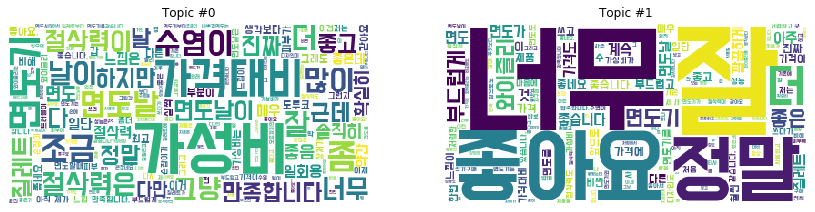

In [67]:
# 주제를 워드 클라우드로 시각화 하기
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 윈도우 os의 폰트 경로
font_path = easygui.fileopenbox()

wc = WordCloud(background_color='white',
              font_path=font_path)

plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wc.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))
    
# 이미지 저장
plt.savefig('LDA_wordcloud.png',bbox_inches='tight')

In [68]:
import numpy as np
from PIL import Image
wizely_mask = np.array(Image.open(easygui.fileopenbox()))

In [69]:
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add('said')

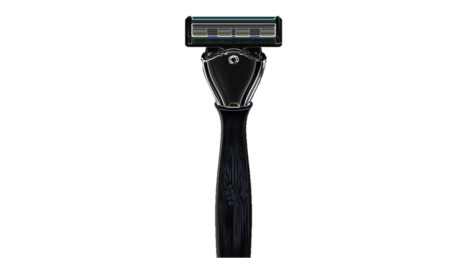

In [70]:
plt.figure(figsize=(8,8))
plt.imshow(wizely_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

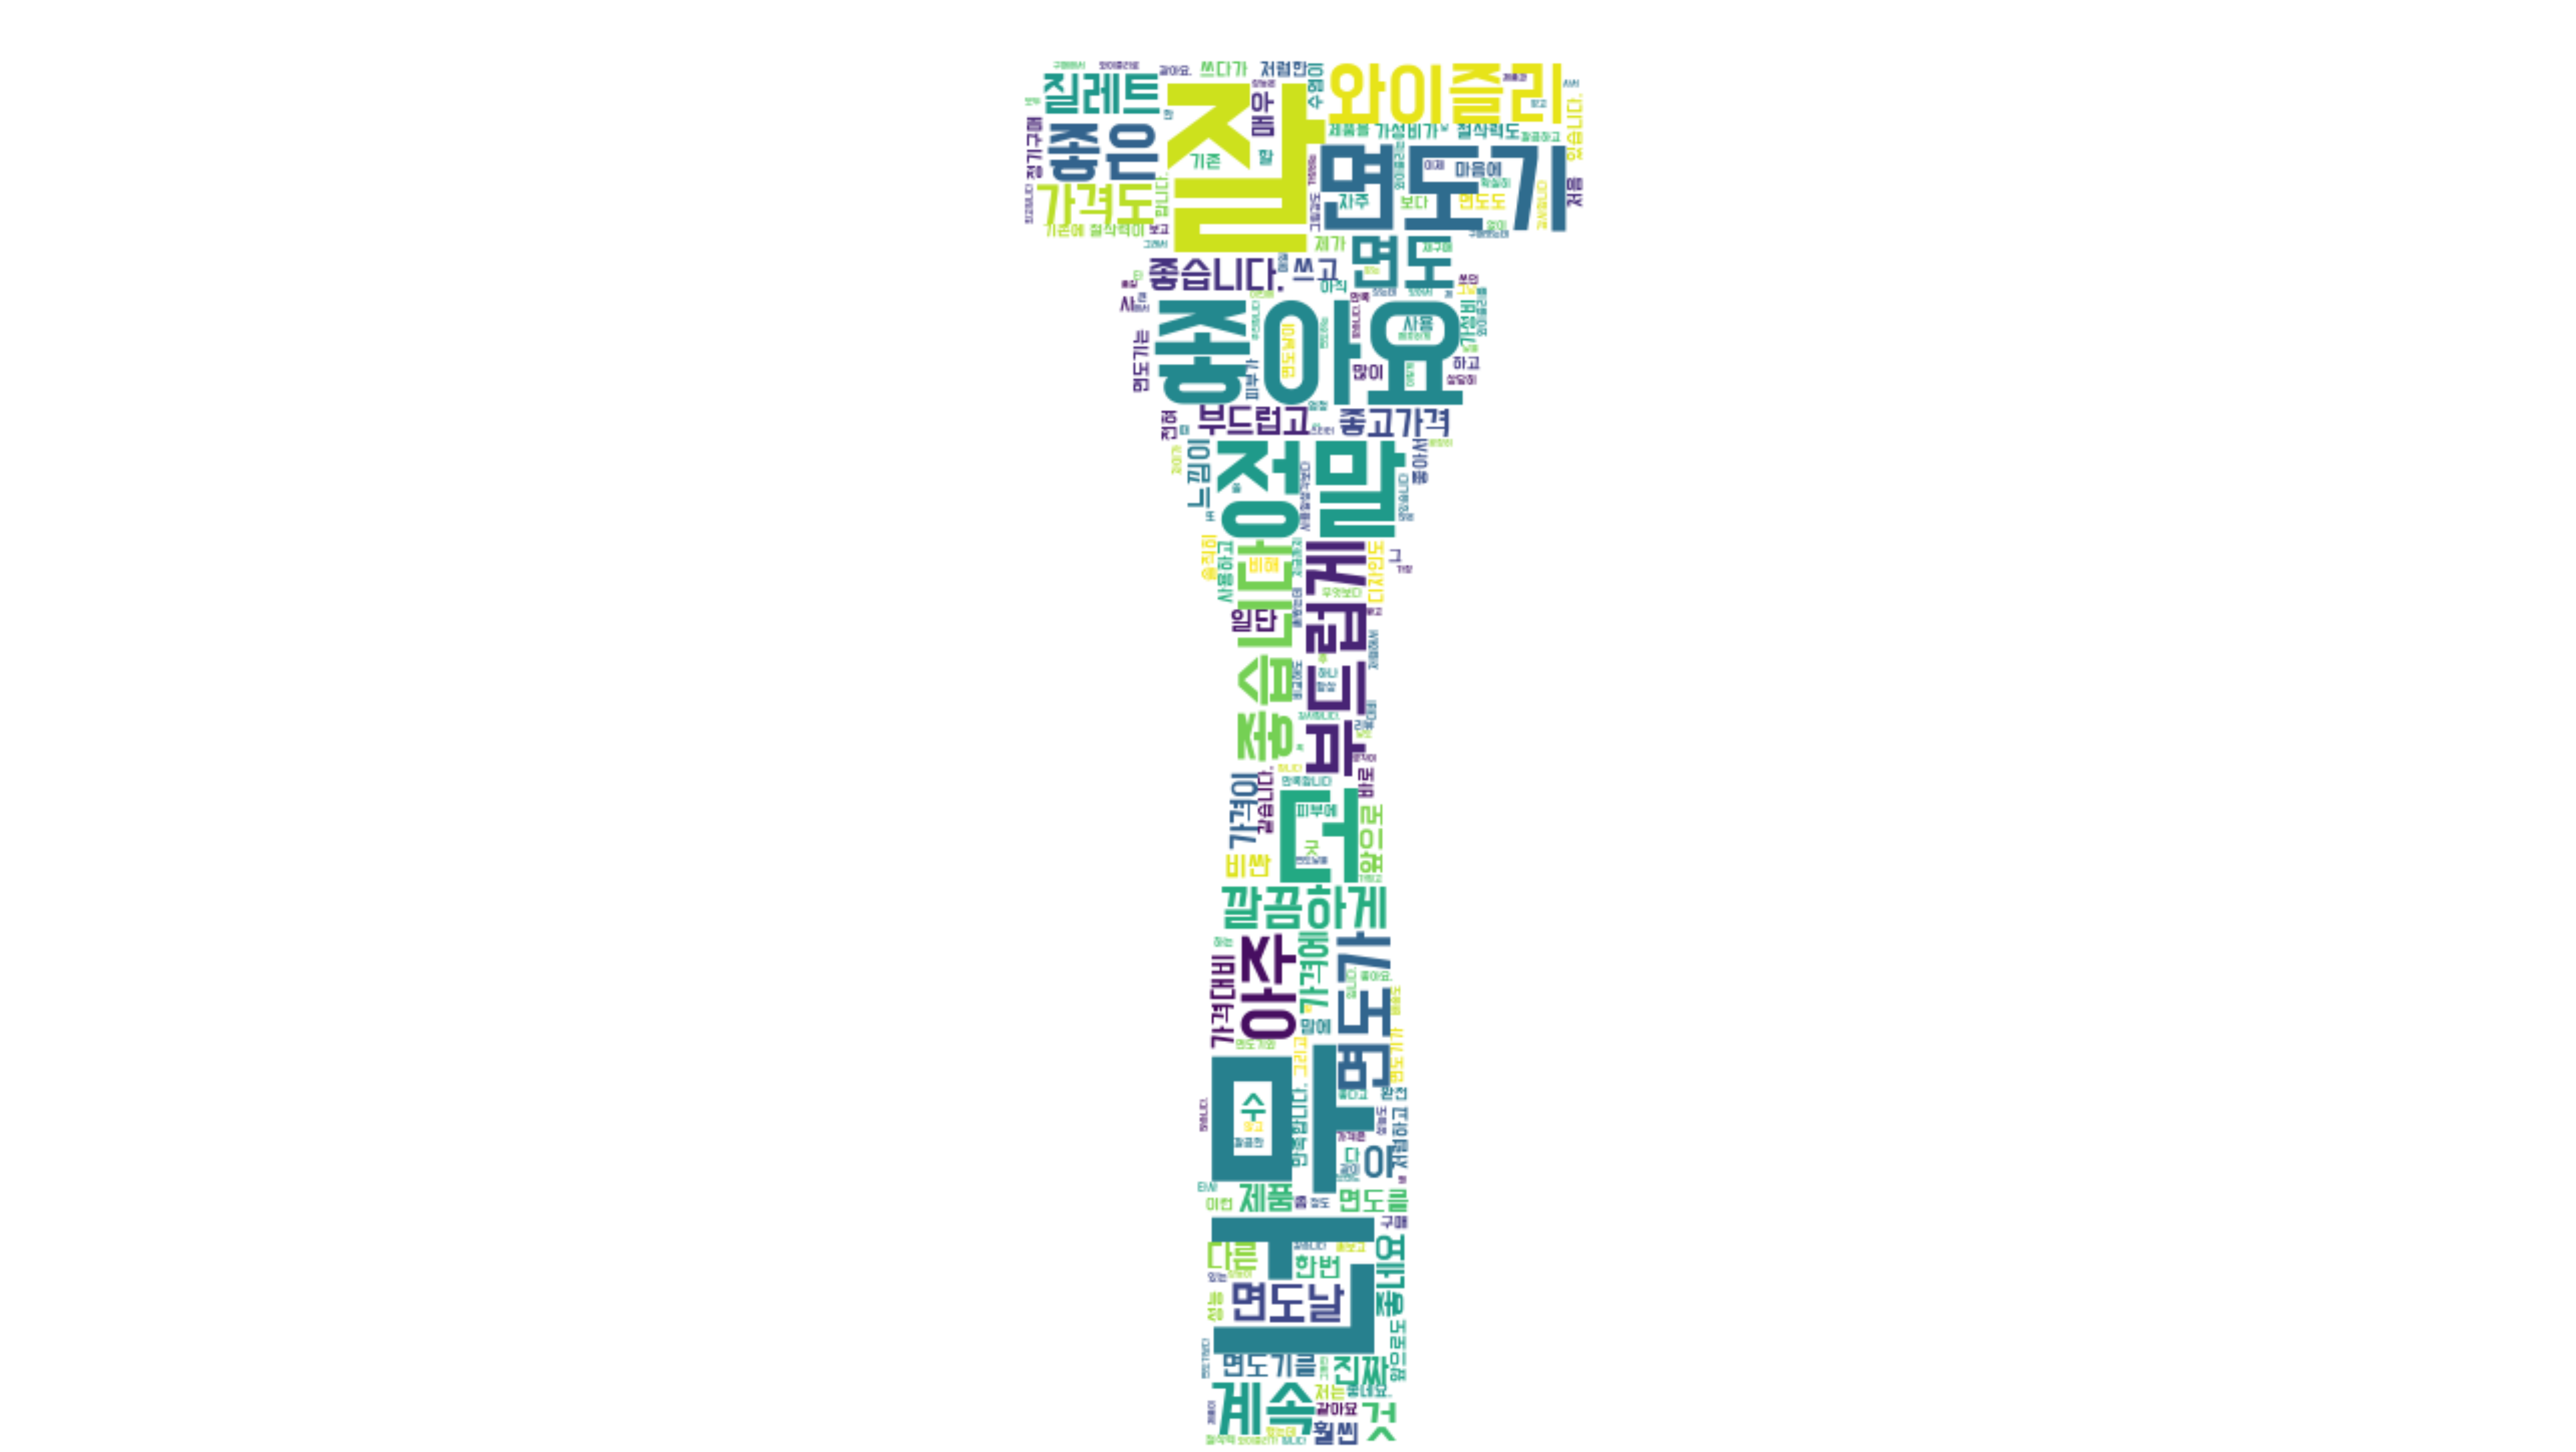

In [80]:
wordcloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white",
    mask = wizely_mask
)

wordcloud = wordcloud.generate_from_frequencies(x)
fig = plt.figure(figsize=(100, 100))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [81]:
fig.savefig('wordcloud_wizely.png')
# python wordcloud 저장  -> 검색
#https://nearman.tistory.com/entry/4-%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C-%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%9B%8C%EB%93%9C-%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C-%EC%82%AC%EC%9A%A9

In [84]:
# word2vec

AttributeError: 'Kkma' object has no attribute '__version__'

In [91]:
from konlpy.tag import Okt,Kkma,Hannanum,Komoran,Mecab   

okt = Okt()
kkma = Kkma()
hannanum = Hannanum()
komoran = Komoran(userdic='/tmp/dic.txt')
mecab = Mecab # 윈도우에서 지원되지 않는다.

def tokenize_okt(doc):
    return['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]
#def tokenize_kkma(doc):
#    return['/'.join(t) for t in kkma.pos(doc)]
def tokenize_hannanum(doc):
    return['/'.join(t) for t in hannanum.pos(doc, norm=True, stem=True)]
def tokenize_komoran(doc):
    return['/'.join(t) for t in komoran.pos(doc, norm=True, stem=True)]

#sentences = tokenize_okt('이것도 되나욕 ㅋㅋㅋ')
#print('1st result:',sentences)

# 명사(Noun), 형용사(Adjective), 동사(Verb)만
#noun_adv_verb_only_list = [word.split("/")[0] for word in sentences if
#                          word.split("/")[1] == "Verb" or word.split("/")[1] == "Adjective" or word.split("/")[1] == "Noun" ]
#print('2st result:',noun_adv_verb_only_list)

data_okt = [tokenize_okt(d) for d in tqdm_notebook(documents)]
#data_kkma = [tokenize_kkma(d) for d in tqdm_notebook(documents)]
#data_hannanum = [tokenize_hannanum(d) for d in tqdm_notebook(documents)]
#data_komoran = [tokenize_komoran(d) for d in tqdm_notebook(documents)]

In [86]:
from konlpy.tag import Kkma
Kkma = Kkma(max_heap_size= 1024 * 6) # 반드시 전역 변수에서 한번만 실행하자
def tokenize_kkma(text):
	try:
		result = ['/'.join(t) for t in kkma.pos(text)]
	except Exception as e:
		return None
	return result

In [87]:
import codecs
# 오류 1: codecs error
# import codecs
# 오류 2: java.lang.OutOfMemoryErrorPyRaisable: java.lang.OutOfMemoryError: Java heap space
# https://blog.naver.com/PostView.nhn?blogId=shino1025&logNo=221589430674&categoryNo=0&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView
data_kkma = [tokenize_kkma(d) for d in tqdm_notebook(documents2)]

In [88]:
import codecs
from gensim.models import word2vec
from konlpy.utils import pprint

In [89]:
w2v_model = word2vec.Word2Vec(data_kkma)
w2v_model.init_sims(replace=True)
pprint(w2v_model.wv.most_similar(positive=tokenize_kkma(u'가성비')))

TypeError: 'NoneType' object is not iterable

In [ ]:
w2v_model = word2vec.Word2Vec(data_okt)
w2v_model.init_sims(replace=True)
pprint(w2v_model.wv.most_similar(positive=tokenize_okt(u'가성비')))

w2v_model = word2vec.Word2Vec(data_kkma)
w2v_model.init_sims(replace=True)
pprint(w2v_model.wv.most_similar(positive=tokenize_kkma(u'가성비')))

w2v_model = word2vec.Word2Vec(data_hannanum)
w2v_model.init_sims(replace=True)
pprint(w2v_model.wv.most_similar(positive=tokenize_hannanum(u'가성비')))

w2v_model = word2vec.Word2Vec(data_komoran)
w2v_model.init_sims(replace=True)
pprint(w2v_model.wv.most_similar(positive=tokenize_komoran(u'가성비')))

w2v_model = word2vec.Word2Vec(texts)
w2v_model.init_sims(replace=True)
pprint(w2v_model.wv.most_similar(positive='가성비',topn=10))

In [3]:
df = pd.read_csv(path)
documents = df['Contents']

In [6]:
list(documents)

['착한 가격에 최고의 품질입니다. 굳이 비싼 돈주고 다른 제품 쓸 필요가 없는 것 같습니다. 전 몇년째 여기서만 쓰고 있습니다. 최고이십니다',
 '품질 포장 배송  모두우수하네요 굿입니다',
 '직접 사용 해보셔요',
 "날 면도를 한 달에 10회 미만으로 하는\n제 입장에서 와이즐리는 합리적인 소비라 생각합니다.\n다만, 아직도 날 면도시 상처가 납니다.\n 늘 깨끗한 피부일 순 없기에 인중이나\n턱 주변에 뾰루지가 생겼기 때문이지요.\n절삭력을 중시한 제품 연구도 좋지만\n'와이즐리 면도기를 쓰면 상처가 안나고\n면도가 가능하다'라는 인식이 생길 수 있게끔\n제품 연구도 해주시면 좋겠습니다.\n\n또한, 분사형으로 된 면도날 세척용액도 만들어\n주시면 좋겠습니다.\n(한 번 쓴 면도날을 바로 버리긴 아까워서\n3~4회는 쓴답니다.)",
 '무게감 그립감 면도감 모두 탁월합니다~',
 '선물용으로 부담스럽지 않아 좋습니다',
 '가성비 짱입니다  최고에요',
 '타사 다른 비슷 제품도 써오고 있었는데 우연한 기회에 와이즐리를 접했는데 확실히 절삭력도 좋고 면도후에 피부 트러블도 좋아져서 대만족 입니다~^^',
 '와이즐리 제품 아주 만족합니다.  한가지 아쉬운점은  면도탈과 면도기 부착 부분에 청소가 어렵네요.  이 문제는 다른 회사 제품들도 마찬가지지만..와이즐리가 해결해 주시면 좋겠네요 ^^',
 '가격대비 가성비 좋아요',
 '레이지 소사이어티 새로 나왓다길래 써봣는데 역시 와이즐리 따라오려면 멀엇네요 레이지 쓸때는 피부 상처난 적이 한두번이 아니엇는데 ㄷㅏ시 와이즐리 쓰니 상처 전혀 안나고 부드럽게 면도 됩니다. 와이즐리 최고!!!',
 '디자인도 마음에 들고 저렴한 가격이 마음에 듭니다.\n한 가지 아쉬운 점이 있어 글 올립니다\n\n정기 구독을 하고 있는데  리필이 배송될때마다 면도날이 플라스틱 통에 들어있고 그 플라스틱 통이 비닐포장 되어있습니다.\n고급스럽긴 하지만 좀 더 친환경적으로 해주셨으면 합니다.\n처음 구독시 오는 플라스틱 통은 유

In [8]:
from keras.preprocessing.text import Tokenizer

In [24]:
def read_data(filename):
    with open(filename, 'r', encoding='utf8') as f:
        result = [line.split('\t') for line in f.read().splitlines()]
        result = result[1:] # header 제외
    return result

train_tmp = read_data('./ratings_train.txt')
text_tmp = read_data('./ratings_test.txt')

In [35]:
def kor_movie(max_num_words=1000):
    train_x = []
    train_y = []
    for i in range(len(train_tmp)):
        train_x.append(train_tmp[i][1])
        train_y.append(int(train_tmp[i][2]))
        
    test_x = []
    test_y = []
    for i in range(len(test_tmp)):
        test_x.append(test_tmp[i][1])
        test_y.append(int(test_tmp[i][2]))
    
    tokenizer = Tokenizer(num_words=max_num_words)
    tokenizer.fit_on_texts(train_x)
    
    token_train_x = tokenizer.texts_to_sequences(train_x)
    token_test_x = tokenizer.texts_to_sequences(test_x)
    
    return (token_train_x, train_y), (token_test_x,test_y)

In [32]:
train_tmp[0][2]

'0'